In [ ]:
import numpy as np
from tensorflow.keras.applications import EfficientNetB0
from PIL import Image
import tensorflow as tf

In [ ]:
IMG_SIZE = 224

def read_image(path):
    image = Image.open(path)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    return np.array([tf.keras.preprocessing.image.img_to_array(image)])
    
test_image = read_image('images/cheap/0_0.jpg')
test_image

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

class Processor(object):
    def __init__(self):
        self.model = EfficientNetB0(include_top=True, weights='imagenet')
        self.model.trainable = False
    
    #@tf.function
    def __call__(self, image_array):
        return self.model.predict(image_array).flatten()
    
processor = Processor()
print(test_image.shape)
processed = processor(test_image)
processed

In [ ]:
from glob import glob

tensors = []
fnames = []

for file in glob('images/*/*_*.jpg'):
    tensors.append(processor(read_image(file)))
    fnames.append(file)
    
tensors = np.array(tensors)
print(tensors)
tensors.shape

In [88]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
result = kmeans.fit(tensors)


In [89]:
predicted = result.predict(tensors)

In [92]:
from matplotlib.pyplot import imshow

cluster_0 = []
for fname, cluster in zip(fnames, predicted):
    if cluster == 0:
        cluster_0.append(fname)
        
# cluster_0

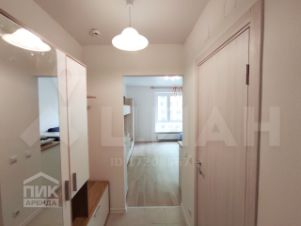

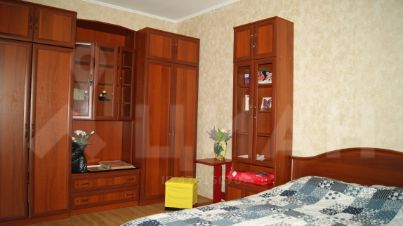

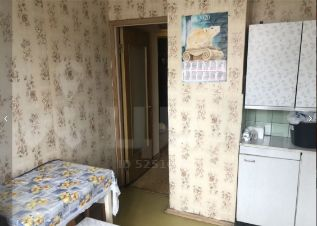

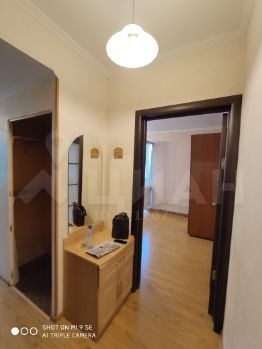

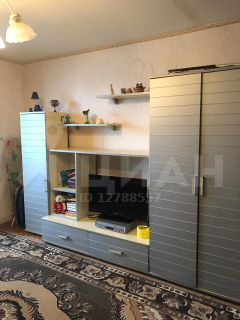

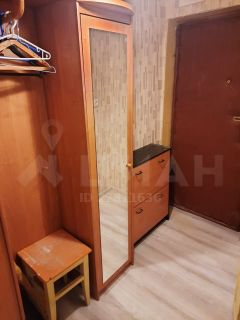

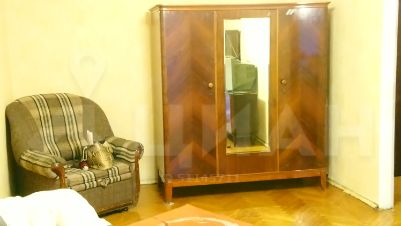

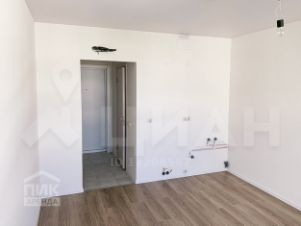

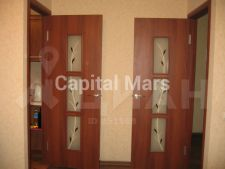

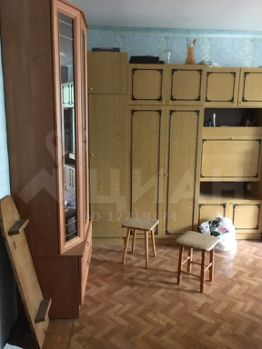

In [104]:
from IPython.display import display
from IPython.display import Image
from matplotlib.pyplot import imshow

cluster_0 = []
for fname, cluster in zip(fnames, predicted):
    if cluster == 9:
        cluster_0.append(fname)
        
display(*map(Image, cluster_0[:10]))